# TASK 1: Credit Scoring Model


---
Goal: Predict whether a person is creditworthy using their financial details like income, debts, and payment history.
Use classification models and check how well they perform.


# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [2]:
from google.colab import files
uploaded = files.upload()

Saving a_Dataset_CreditScoring.xlsx to a_Dataset_CreditScoring.xlsx


# Load The Data

In [3]:
dataset=pd.read_excel("/content/a_Dataset_CreditScoring.xlsx")
dataset

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,0,126441,0,0,0,2,0.0,2,199,10,...,9.0,0.7853,0.6923,0,0,0,0.6538,0,0,0.3529
2996,0,126448,0,0,0,0,NaN,0,270,3,...,5.0,0.5766,0.9286,0,0,0,0.8571,0,0,0.4167
2997,0,126465,1,1,0,8,0.0,5,234,4,...,9.0,0.8722,0.6071,0,0,0,0.4286,1,0,0.7500
2998,0,126487,4,4,0,2,3.0,1,257,3,...,3.0,1.0391,0.6000,0,1,2,0.6000,4,1,1.0000


# Data preparation

In [4]:
dataset.shape

(3000, 30)

In [5]:
dataset.head()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
0,1,582,3,3,0,4,0.0,5,117,27,...,3.0,0.9179,0.2083,2,3,7,0.2083,4,4,0.0000
1,1,662,15,9,0,3,1.0,3,14,14,...,1.0,0.8000,0.0000,0,0,0,1.0000,12,0,1.0000
2,1,805,0,0,0,1,5.0,1,354,7,...,5.0,0.3552,0.6538,0,1,1,0.7308,1,1,0.5263
3,1,1175,8,5,0,6,1.0,10,16,4,...,3.0,0.9127,0.2500,1,1,1,0.7500,7,1,1.3333
4,1,1373,3,1,0,9,0.0,8,130,52,...,1.0,1.2511,0.0000,0,1,4,0.1429,3,1,0.0000


In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   TARGET           3000 non-null   int64  
 1   ID               3000 non-null   int64  
 2   DerogCnt         3000 non-null   int64  
 3   CollectCnt       3000 non-null   int64  
 4   BanruptcyInd     3000 non-null   int64  
 5   InqCnt06         3000 non-null   int64  
 6   InqTimeLast      2812 non-null   float64
 7   InqFinanceCnt24  3000 non-null   int64  
 8   TLTimeFirst      3000 non-null   int64  
 9   TLTimeLast       3000 non-null   int64  
 10  TLCnt03          3000 non-null   int64  
 11  TLCnt12          3000 non-null   int64  
 12  TLCnt24          3000 non-null   int64  
 13  TLCnt            2997 non-null   float64
 14  TLSum            2960 non-null   float64
 15  TLMaxSum         2960 non-null   float64
 16  TLSatCnt         2996 non-null   float64
 17  TLDel60Cnt    

In [7]:
dataset.describe()

,TARGET,ID,DerogCnt,CollectCnt,BanruptcyInd,InqCnt06,InqTimeLast,InqFinanceCnt24,TLTimeFirst,TLTimeLast,...,TL50UtilCnt,TLBalHCPct,TLSatPct,TLDel3060Cnt24,TLDel90Cnt24,TLDel60CntAll,TLOpenPct,TLBadDerogCnt,TLDel60Cnt24,TLOpen24Pct
count,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,3000.000000,2812.000000,3000.000000,3000.000000,3000.000000,...,2901.000000,2959.000000,2996.000000,3000.000000,3000.000000,3000.000000,2997.000000,3000.000000,3000.000000,2997.000000
mean,0.166667,62922.683667,1.430000,0.857000,0.153333,3.108333,3.108108,3.555000,170.113667,11.873667,...,4.077904,0.648178,0.518331,0.726000,0.814667,2.522000,0.496168,1.409000,1.068333,0.564219
std,0.372740,37203.691912,2.731469,2.161352,0.360369,3.479171,4.637831,4.477536,92.813700,16.321412,...,3.108076,0.266486,0.234759,1.163633,1.609508,3.407255,0.206722,2.460434,1.806124,0.480105
min,0.000000,66.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,30376.500000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,106.000000,4.000000,...,2.000000,0.501100,0.352900,0.000000,0.000000,0.000000,0.344800,0.000000,0.000000,0.250000
50%,0.000000,62872.500000,0.000000,0.000000,0.000000,2.000000,1.000000,2.000000,151.000000,7.000000,...,3.000000,0.695500,0.527050,0.000000,0.000000,1.000000,0.500000,0.000000,0.000000,0.500000
75%,0.000000,96156.500000,2.000000,1.000000,0.000000,4.000000,3.000000,5.000000,227.000000,13.000000,...,6.000000,0.840650,0.681800,2.000000,1.000000,4.000000,0.625000,2.000000,1.000000,0.800000
max,1.000000,126503.000000,51.000000,50.000000,1.000000,40.000000,24.000000,48.000000,933.000000,342.000000,...,23.000000,3.361300,1.000000,8.000000,19.000000,45.000000,1.000000,47.000000,20.000000,6.000000


# Data Cleaning & Preprocessing

In [8]:
# Drop ID column from the dataset
dataset = dataset.drop('ID', axis=1)
dataset.shape

(3000, 29)

In [9]:
# Explore missing values
dataset.isnull().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,188
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


In [10]:
# Filling missing values with mean
dataset=dataset.fillna(dataset.mean())

In [11]:
# Again explore missing values
dataset.isnull().sum()

,0
TARGET,0
DerogCnt,0
CollectCnt,0
BanruptcyInd,0
InqCnt06,0
InqTimeLast,0
InqFinanceCnt24,0
TLTimeFirst,0
TLTimeLast,0
TLCnt03,0


# EDA

# Countplot

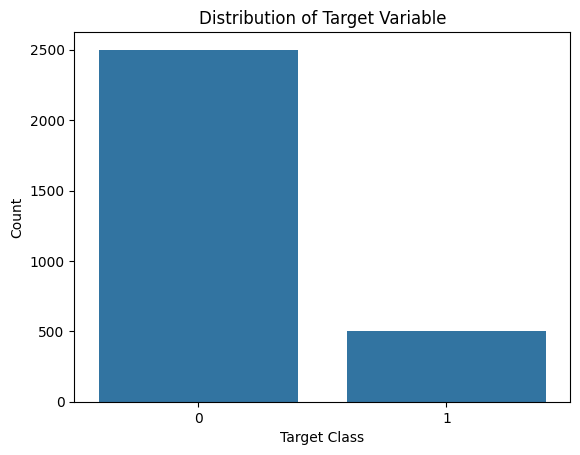

In [12]:
sns.countplot(x='TARGET', data=dataset)
plt.title('Distribution of Target Variable')
plt.xlabel('Target Class')
plt.ylabel('Count')
plt.show()

# Histogram

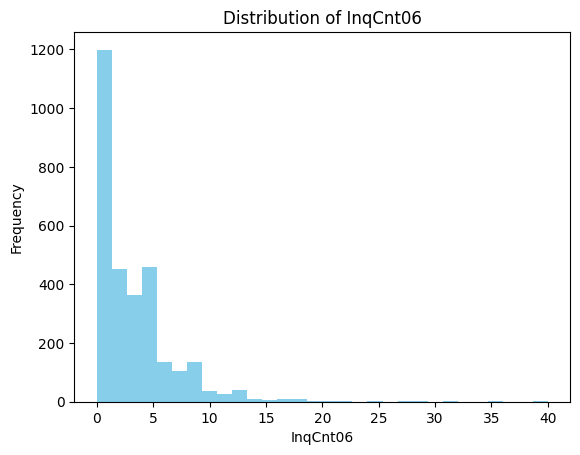

In [13]:
plt.hist(dataset['InqCnt06'], bins=30, color='skyblue')
plt.title('Distribution of InqCnt06')
plt.xlabel('InqCnt06')
plt.ylabel('Frequency')
plt.show()

# Scatterplot

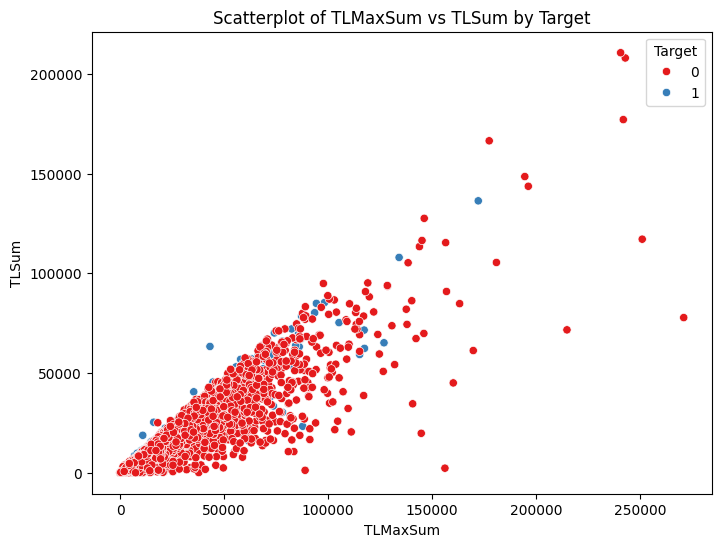

In [14]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=dataset, x='TLMaxSum', y='TLSum', hue='TARGET', palette='Set1')
plt.title('Scatterplot of TLMaxSum vs TLSum by Target')
plt.xlabel('TLMaxSum')
plt.ylabel('TLSum')
plt.legend(title='Target')
plt.show()

# Correlation Heatmap

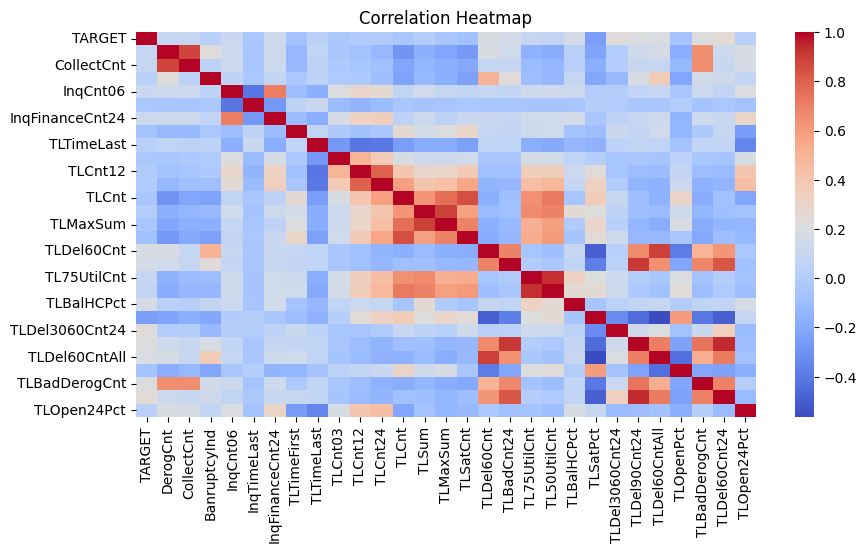

In [15]:
plt.figure(figsize=(10,5))
corr = dataset.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title('Correlation Heatmap')
plt.show()

# Violin Plot

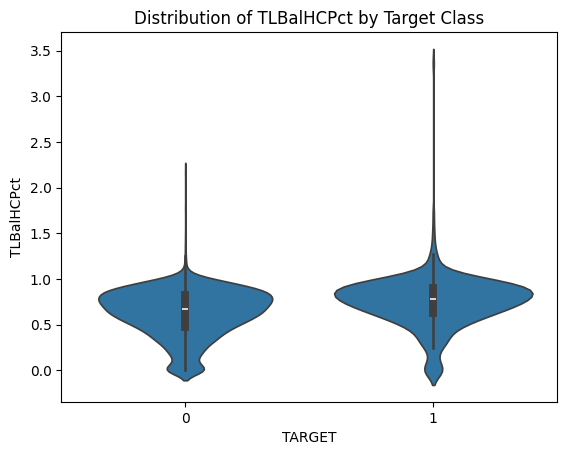

In [16]:
sns.violinplot(x='TARGET', y='TLBalHCPct', data=dataset)
plt.title('Distribution of TLBalHCPct by Target Class')
plt.show()

# Boxplot

/tmp/ipython-input-3197533938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dataset, x='TARGET', y='TLMaxSum', palette='Set2')


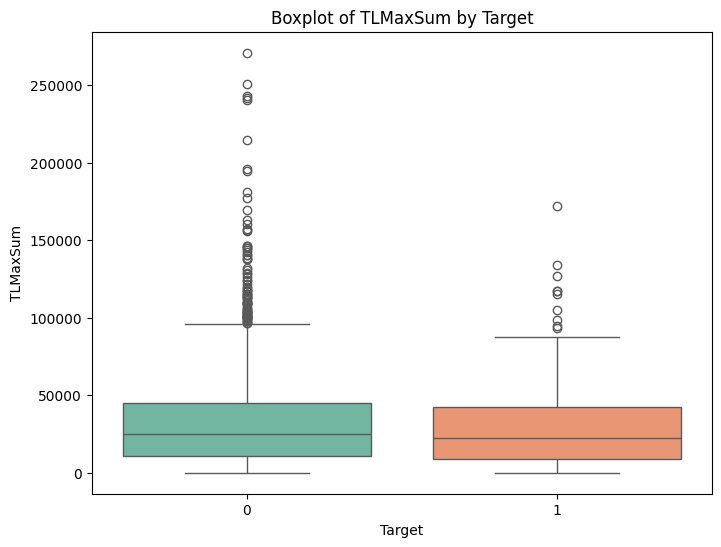

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(data=dataset, x='TARGET', y='TLMaxSum', palette='Set2')
plt.title('Boxplot of TLMaxSum by Target')
plt.xlabel('Target')
plt.ylabel('TLMaxSum')
plt.show()

# Bar Plot

/tmp/ipython-input-1434852022.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='TARGET', y='TLSum', data=dataset, estimator='mean', palette='pastel')


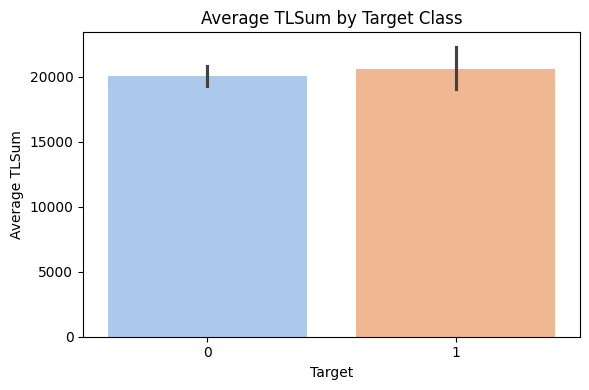

In [18]:
plt.figure(figsize=(6,4))
sns.barplot(x='TARGET', y='TLSum', data=dataset, estimator='mean', palette='pastel')
plt.title('Average TLSum by Target Class')
plt.xlabel('Target')
plt.ylabel('Average TLSum')
plt.tight_layout()
plt.show()

# KDE Plot (Kernel Density Estimate)

/tmp/ipython-input-2854085380.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(dataset['TLMaxSum'], shade=True, color='purple')


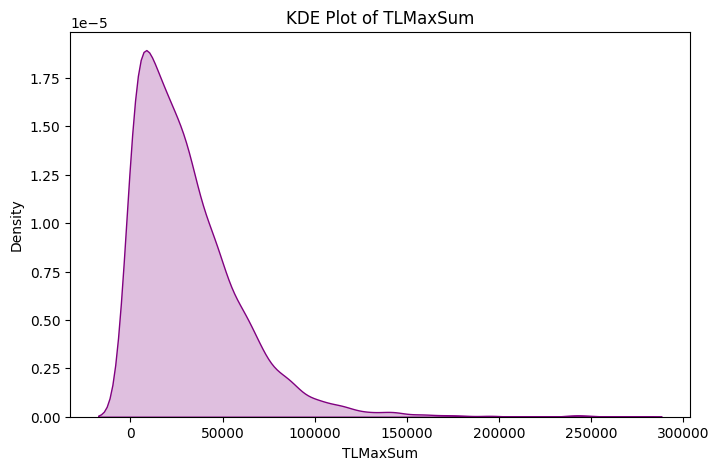

In [19]:
plt.figure(figsize=(8, 5))
sns.kdeplot(dataset['TLMaxSum'], shade=True, color='purple')
plt.title("KDE Plot of TLMaxSum")
plt.xlabel("TLMaxSum")
plt.ylabel("Density")
plt.show()

In [20]:
# Identify Numerical & Categorical Columns
numerical_cols = dataset.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = dataset.select_dtypes(include=['object', 'category']).columns.tolist()

print("Numerical columns:", numerical_cols)
print("Categorical columns:", categorical_cols)

Numerical columns: ['TARGET', 'DerogCnt', 'CollectCnt', 'BanruptcyInd', 'InqCnt06', 'InqTimeLast', 'InqFinanceCnt24', 'TLTimeFirst', 'TLTimeLast', 'TLCnt03', 'TLCnt12', 'TLCnt24', 'TLCnt', 'TLSum', 'TLMaxSum', 'TLSatCnt', 'TLDel60Cnt', 'TLBadCnt24', 'TL75UtilCnt', 'TL50UtilCnt', 'TLBalHCPct', 'TLSatPct', 'TLDel3060Cnt24', 'TLDel90Cnt24', 'TLDel60CntAll', 'TLOpenPct', 'TLBadDerogCnt', 'TLDel60Cnt24', 'TLOpen24Pct']
Categorical columns: []


In [21]:
# Split Data into Features & Target
X = dataset.drop('TARGET', axis=1)
y = dataset['TARGET']

In [22]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Feature Scaling (Standardization)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Model Training & & Evaluation

# Logistic Regression

In [24]:
# Train
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# Predict
y_pred = lr_model.predict(X_test)
y_prob = lr_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob))

Confusion Matrix:
 [[466  16]
 [ 96  22]]

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.97      0.89       482
           1       0.58      0.19      0.28       118

    accuracy                           0.81       600
   macro avg       0.70      0.58      0.59       600
weighted avg       0.78      0.81      0.77       600

ROC-AUC Score: 0.8018320557001196


# Decision Tree

In [25]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)
y_prob_dt = dt_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Decision Tree Results")
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_dt))

Decision Tree Results
[[417  65]
 [ 79  39]]
              precision    recall  f1-score   support

           0       0.84      0.87      0.85       482
           1       0.38      0.33      0.35       118

    accuracy                           0.76       600
   macro avg       0.61      0.60      0.60       600
weighted avg       0.75      0.76      0.75       600

ROC-AUC Score: 0.5978268513960194


# Random Forest

In [26]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

# Evaluation
print("Random Forest Results")
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
print("ROC-AUC Score:", roc_auc_score(y_test, y_prob_rf))

Random Forest Results
[[473   9]
 [103  15]]
              precision    recall  f1-score   support

           0       0.82      0.98      0.89       482
           1       0.62      0.13      0.21       118

    accuracy                           0.81       600
   macro avg       0.72      0.55      0.55       600
weighted avg       0.78      0.81      0.76       600

ROC-AUC Score: 0.8017441451578873


# Model Comparison & Selection

In [27]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Collect metrics
models = ['Logistic Regression', 'Decision Tree', 'Random Forest']
precision = [precision_score(y_test, y_pred),
             precision_score(y_test, y_pred_dt),
             precision_score(y_test, y_pred_rf)]
recall = [recall_score(y_test, y_pred),
          recall_score(y_test, y_pred_dt),
          recall_score(y_test, y_pred_rf)]
f1 = [f1_score(y_test, y_pred),
      f1_score(y_test, y_pred_dt),
      f1_score(y_test, y_pred_rf)]
roc_auc = [roc_auc_score(y_test, y_prob),
           roc_auc_score(y_test, y_prob_dt),
           roc_auc_score(y_test, y_prob_rf)]

# Create DataFrame
results = pd.DataFrame({
    'Model': models,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1,
    'ROC-AUC': roc_auc
})

print(results)

                 Model  Precision    Recall  F1-Score   ROC-AUC
0  Logistic Regression   0.578947  0.186441  0.282051  0.801832
1        Decision Tree   0.375000  0.330508  0.351351  0.597827
2        Random Forest   0.625000  0.127119  0.211268  0.801744


# Plot ROC-AUC Curves

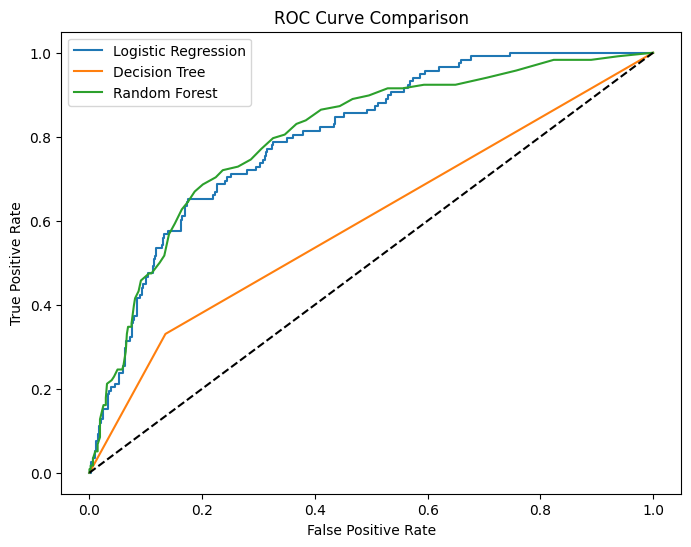

In [28]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob)
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_prob_dt)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

plt.figure(figsize=(8,6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree')
plt.plot(fpr_rf, tpr_rf, label='Random Forest')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend()
plt.show()

# Final Insights


---
- The dataset contains only numeric features, simplifying preprocessing.
- People with more credit inquiries and larger loan amounts are more likely to have bad credit.
- Features like 'DerogCnt', 'CollectCnt', and 'BanruptcyInd' are strongly linked to poor credit outcomes.
- A higher number of recent credit checks and delinquencies are risk indicators.
- Logistic Regression performed moderately with limited accuracy.
- Decision Tree showed improvement but some overfitting.
- Random Forest gave the best performance across all metrics.
- Hence, Random Forest is recommended for predicting credit risk.
- These findings can support banks in improving loan approval decisions and risk management.